<h1>Jeff Pinegar </h1>
<em><h3>SQLAlchemy Challenge</h3></em>
Dec 7, 2022 <br>
jeffpinegar1@gmail.com <br>
717-982-0516 <br>


In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

# Pandas
import pandas as pd

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Stat_Location = Base.classes.station
Stat_measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_record = session.query(Stat_measurement.date).order_by(Stat_measurement.date.desc()).first()  # add the desc() method to sort descending.
print(most_recent_record)
first_row = session.query(Stat_measurement).first()
first_row.__dict__

('2017-08-23',)


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ce4d477610>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

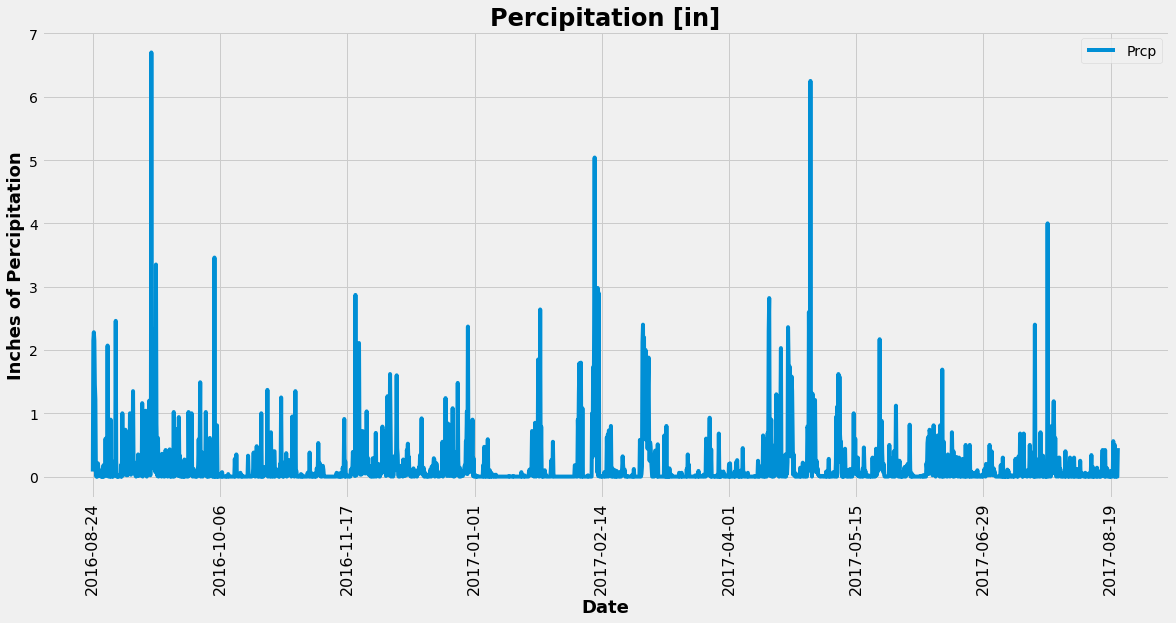

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

import datetime as dt
from datetime import date


# The most resent date as string
most_recent_date_str = most_recent_record.date

# convert that string to datatime
most_recent_date = date.fromisoformat(most_recent_date_str)

# Calculate the date one year from the last date in data set.
one_year_ago = date((most_recent_date.year - 1), most_recent_date.month, most_recent_date.day).isoformat()

# Perform a query to retrieve the data and precipitation scores
data = session.query(Stat_measurement.date, Stat_measurement.station, Stat_measurement.prcp).\
    filter (Stat_measurement.date > one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data, columns =['Date', 'Station', 'Prcp'])
dfi = df.set_index('Date')

# Sort the dataframe by date
dfi.sort_index(inplace = True, ascending=True)
dfi = dfi.dropna(how='any')

# Use Pandas Plotting with Matplotlib to plot the data
dfi.plot(figsize = (18,8))
plt.title('Percipitation [in]',
         fontsize = 24,
         color = 'black',
         fontweight="bold")

plt.xlabel('Date',
          fontsize = 18,
          color = 'black',
          fontweight = 'bold')

plt.ylabel('Inches of Percipitation',
          fontsize = 18,
          color = 'black',
          fontweight = 'bold')

plt.xticks(rotation = 90, fontsize=16);

save_fig1 = os.path.join('.', 'Output', 'Percipitation.jpg')
plt.savefig(save_fig1, bbox_inches='tight')

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dfi.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
dfi['Station'].nunique()

7

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

a = dfi.groupby(['Station']).size().sort_values(ascending=False)
print(a)

Station
USC00519397    358
USC00519281    351
USC00513117    342
USC00516128    327
USC00519523    313
USC00514830    264
USC00517948     60
dtype: int64


In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# most active station

# query to select data from the most active station

results = session.query(Stat_measurement.station, Stat_measurement.date, Stat_measurement.tobs).all()
df = pd.DataFrame(results, columns =['Station', 'Date', 'tobs'])
a = df.groupby(['Station']).size().sort_values(ascending=False)
most_active = a.index[0]


data2 = session.query(Stat_measurement.date, Stat_measurement.station, Stat_measurement.tobs).\
    filter (Stat_measurement.date > one_year_ago).\
    filter (Stat_measurement.station == most_active).all()

df_temp = pd.DataFrame(data2, columns =['Date', 'Station', 'Temperature'])
dfi_temp = df_temp.set_index('Date')
df_temp.describe()

,Temperature
count,351.000000
mean,73.096866
std,4.735491
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


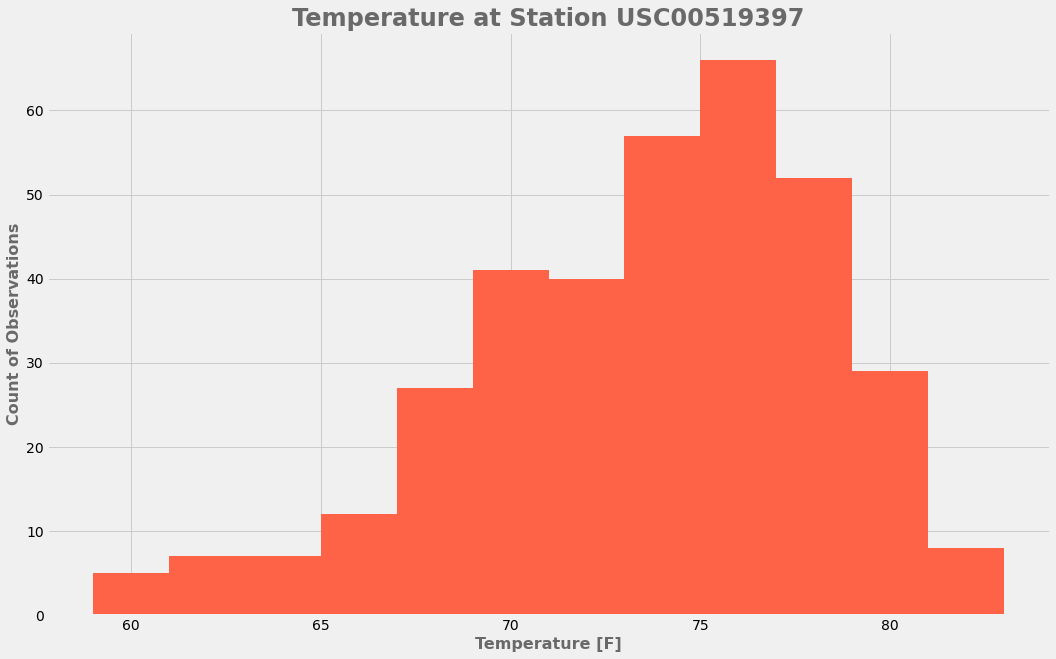

In [15]:
# Plot histogram of a Pandas dataframe
# Assumptions
#   - import of pandas as pd
#   - import of matplotlib

#############################################################
#   Initialize values for Histogram plot                    #
#############################################################
df_plot = dfi_temp
hist_var = 'Temperature'
txt_color = 'dimgray'
bar_color = 'tomato'
title_txt = 'Temperature at Station USC00519397'
x_title = 'Temperature [F]'
y_title = 'Count of Observations'
num_of_bins = 12
trim = 0   #amount to add and subtract from the min and max
#                      End of Initialiation                 #
#############################################################

# calulate range for the histogram
min_range = df_plot[hist_var].min()-trim
max_range = df_plot[hist_var].max()+trim


plt.figure(figsize=(16,10)) 

plt.hist(df_plot[hist_var], color=bar_color, bins=num_of_bins,range=(min_range,max_range)); 
plt.title(title_txt,                                # Add a title
            fontsize = 24,
            color=txt_color, 
            fontweight="bold")         
plt.ylabel(y_title,                                 # Add a y-axis description
            fontsize = 16, 
            color=txt_color, 
            fontweight="bold")                              
plt.xlabel(x_title,                                 # Add a x-axis descrition
            fontsize = 16,
            color=txt_color, 
            fontweight="bold")

# Save the figure to Output directory 
save_fig = os.path.join('.','Output', 'Temp_at_Station_USC00519397.jpg')  
plt.savefig(save_fig, bbox_inches='tight')

# Close session

In [16]:
# Close Session
session.close()